20163228 Yuseon Nam

In [1]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math

In [2]:
# Make x and y domain matrix
def make_domain_matrix() :
    xy_matrix = np.zeros((row_size, col_size, 2), dtype=int)
        
    for r in range(row_size) :
        xy_matrix[r, :, 0] = r
        
    for c in range(col_size) :
        xy_matrix[:, c, 1] = c
        
    xy_matrix = xy_matrix / pix_size

    return (xy_matrix)


# Distance function between two vectors x and y
def distance(x, y):
    
    d = (x - y) ** 2
    s = np.sum(d)
    
    return(s)


# Plot image
def plot_image(img) :
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    
# Plot energy
def plot_energy(energy) :
    plt.plot(energy)
    plt.show()

In [3]:
class KMeans() :
    def __init__(self, k, lamda) : 
        self.k = k
        self.lamda = lamda
        
        self.cur_label  = np.zeros((row_size, col_size), dtype=int)
        self.prev_label = np.zeros((row_size, col_size), dtype=int)
        
        self.centroid_rgb = np.zeros((self.k, 3), dtype=float)
        self.centroid_xy    = np.zeros((self.k, 2), dtype=float)
        self.centroid_count = np.zeros((self.k, 3), dtype=int)
        
        self.energy_list = []
        
    
    def calculate_distance(self, r, c, i) :
        
        rgb_dist = distance(normalized_img[r, c, :], self.centroid_rgb[i, :])
        xy_dist  = distance(xy_domain[r, c, :], self.centroid_xy[i, :])
        
        dist_sum = rgb_dist + self.lamda * xy_dist
        
        return dist_sum
    
    
    def init_centroid(self) :       
        for r in range (row_size) :
            for c in range (col_size) :
                rand_label = random.randint(0, self.k-1)
                self.cur_label[r][c] = rand_label
    
    
    def update_centroid(self) :
        
        self.centroid_rgb = np.zeros((self.k, 3), dtype=float)
        self.centroid_xy    = np.zeros((self.k, 2), dtype=float)
        self.centroid_count = np.zeros((self.k), dtype=int)
        
        # Sum up the element value by label
        for r in range (row_size) :
            for c in range (col_size) :
                label = self.cur_label[r][c]
                self.centroid_rgb[label, :] += normalized_img[r, c, :]
                self.centroid_xy[label, :]  += xy_domain[r, c, :]
                self.centroid_count[label]  += 1
                
        
        # Calculate the centroid value
        for i in range (self.k) :
            if (self.centroid_count[i] != 0) :
                self.centroid_rgb[i] /= self.centroid_count[i]
                self.centroid_xy[i]  /= self.centroid_count[i]
                
    
    def labeling(self) :
        energy_sum = 0
        
        # Label for each element
        for r in range (row_size) :
            for c in range(col_size) :
                dist_list = np.zeros(self.k, dtype=float)
                
                # Calculate distance between each centroid and element
                for i in range (self.k) :
                    rgb = normalized_img[r, c, :]
                    xy = xy_domain[r, c, :]
                    dist_list[i] = self.calculate_distance(r, c, i)
                
    
                # Find minimum distance and its index
                min_dist = min(dist_list)
                min_index = np.argmin(dist_list)
                
                # Put min index in the label
                self.cur_label[r][c] = min_index
                
                # Sum Energy
                energy_sum += min_dist
                
        # Calculate Iteration Energy
        energy = energy_sum / (row_size * col_size)
#         print("Energy :", energy)
        self.energy_list.append(energy)
        
    
    def make_image(self) :
        
        kmeans_image = np.zeros((row_size, col_size, 3), dtype="uint8")
        
        for r in range (row_size) :
            for c in range (col_size) :
                label = self.cur_label[r][c]
                kmeans_image[r, c, :] = self.centroid_rgb[label, :] * std + mean
                
        origin_rgb = self.centroid_rgb * std + mean
#         print("Original RGB")
#         print(origin_rgb)
                
        return (kmeans_image)
    
    
    def train(self) :
        
        self.iter = 0
        self.init_centroid()
            
#         # Just for test
#         kmeans_img = self.make_image()
#         plot_image(kmeans_img)
        
        while not (np.array_equal(self.cur_label, self.prev_label)) :
            
            self.update_centroid()
            
#             # Just for test
#             print("=====================",self.iter,"============================")
#             print("RGB")
#             print(self.centroid_rgb)
#             print("XY")
#             print(self.centroid_xy)
            
#             kmeans_img = self.make_image()
#             plot_image(kmeans_img)
            
            self.prev_label = copy.deepcopy(self.cur_label)
            
            self.iter += 1
            
            self.labeling()
            
            
        # Make cur_center_label as image
        kmeans_img = self.make_image()
        
        return (kmeans_img, self.energy_list)
                

(771, 420, 3)
<class 'numpy.uint8'>
[132.08024211 172.46931011 165.69481193]
[64.09014854 40.20294465 43.99573457]


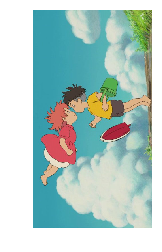

In [4]:
# Read image
im = pilimg.open("img.jpg")

# Make and image as array
origin_img = np.array(im)

# Show image
plt.imshow(origin_img)
plt.axis('off')

# Check image size
print(np.shape(origin_img))
print(type(origin_img[0][0][0]))

row_size = len(origin_img)
col_size = len(origin_img[0])
pix_size = row_size * col_size

# Calculate mean and std
mean = np.zeros(3, dtype=float)
std  = np.zeros(3, dtype=float)

for i in range (3) :
    mean[i] = np.mean(origin_img[:, :, i])
    std[i]  = np.std(origin_img[:, :, i])

print(mean)
print(std)

# normalized image
normalized_img = (origin_img - mean) / std

# Make normalized xy domain of image
xy_domain = make_domain_matrix()

In [ ]:
def kmeans(k_num, lamda) :
    k_means= KMeans(k_num, lamda)
    kmeans_image, kmeans_energy = k_means.train()

    plot_image(kmeans_image)
    plot_energy(kmeans_energy)

# K = 2

## λ = 0.1

In [ ]:
kmeans(k_num=2, lamda=0.1)

### λ = 1

In [ ]:
kmeans(k_num=2, lamda=1)

## λ = 10

In [ ]:
kmeans(k_num=2, lamda=10)

# K = 4

## λ = 0.1

In [ ]:
kmeans(k_num=4, lamda=0.1)

## λ = 1

In [ ]:
kmeans(k_num=4, lamda=1)

## λ = 10

In [ ]:
kmeans(k_num=4, lamda=10)

# K = 8

## λ = 0.1

In [ ]:
kmeans(k_num=8, lamda=0.1)

## λ = 1

In [ ]:
kmeans(k_num=8, lamda=1)

## λ = 10

In [ ]:
kmeans(k_num=8, lamda=10)